In [1]:
import numpy as np
from astropy.table import Table, join, MaskedColumn, vstack, Column
from astropy.io import ascii
import matplotlib.pyplot as plt

from pipeline import Properties_of_EBs

/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/Tobin/.lightkurve/cache. Please move all the files in the legacy directory /Users/Tobin/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
data=ascii.read('rnaasac6e42t1_mrt.txt')

ind_of_ids = np.array([5,10,12,17,19,27,36,45,46, 49])

Our_Sample=data[ind_of_ids]

Our_Sample_Reselect=Our_Sample[np.array([0,1,3,4,5,6,7,9])]
Our_Sample_Reselect

Use_periods= [1.582, Our_Sample['BLS-Period'][1], 0.4712, 0.5679, 1.125*2, 0.626*2, 0.875, Our_Sample['BLS-Period'][9]]
Use_step_size= [50,300,50,50,50,50, 250, 1000]

Our_Sample_Reselect.add_column(Use_periods, name='Use_Period')
Our_Sample_Reselect.add_column(Use_step_size, name='Use_Search_Steps')

Our_Sample_Reselect

Obj-ID,Sector,Smooth,BLS-Max-Power,BLS-Period,ACF-Max-Power,ACF-Period,Z5,Class,Manual,Use_Period,Use_Search_Steps
,,,,d,,d,,,,,
str14,int64,int64,float64,float64,float64,float64,int64,str5,str5,float64,int64
TIC 7720507,25,1,5935.405967,1.57154827,0.297338213,1.57154827,4,EB,EB,1.582,50
...,...,...,...,...,...,...,...,...,...,...,...
TIC 43333148,26,1,2991.608488,9.476480833,0.251279303,18.95296167,8,EB,EB,9.476480833,1000


In [3]:
c = Properties_of_EBs(Our_Sample['Obj-ID'][0], Our_Sample_Reselect, Our_Sample_Reselect['Use_Search_Steps'][0])

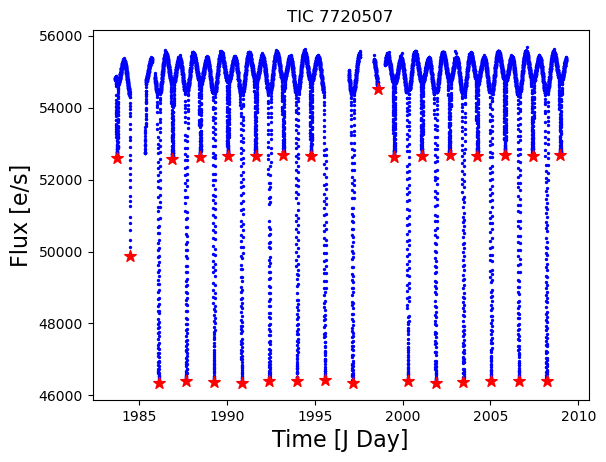

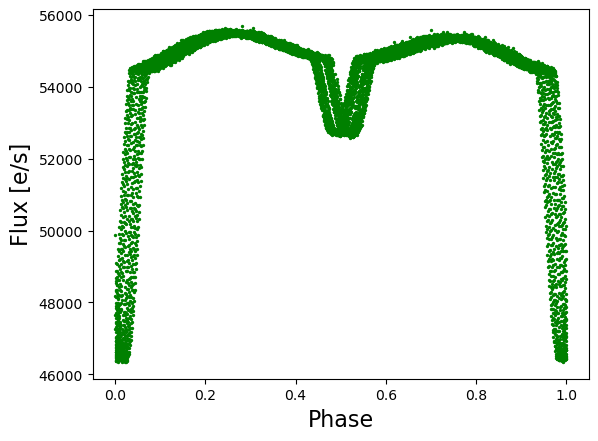

In [4]:
c.runAll()

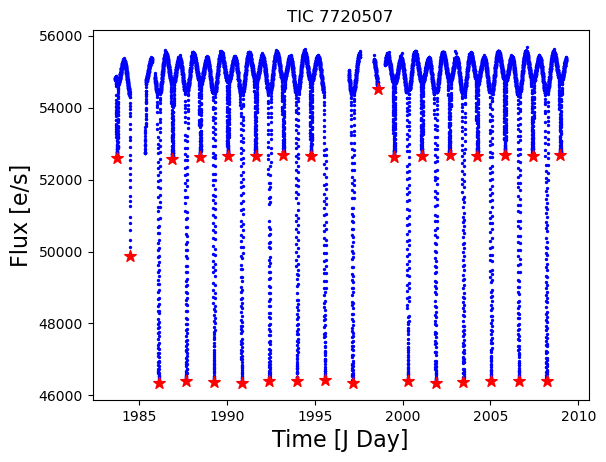

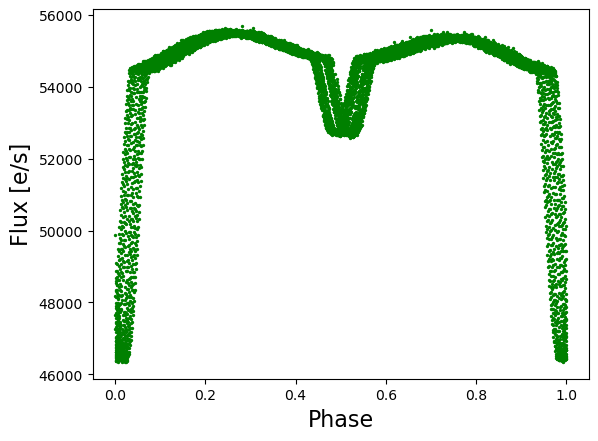

1.3119613668999903


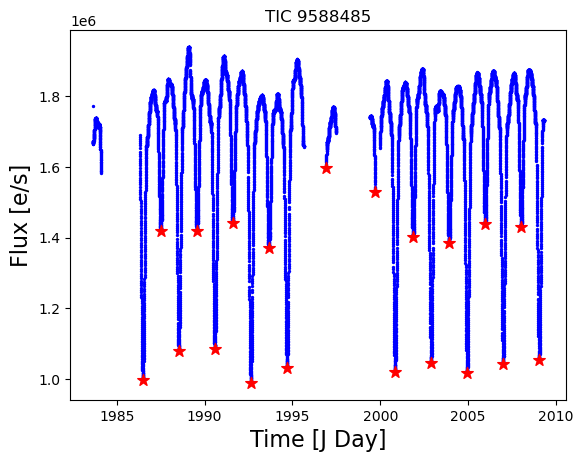

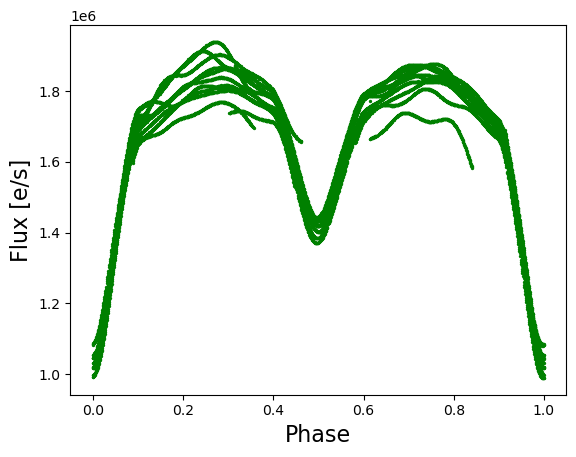

1.4387786587901914


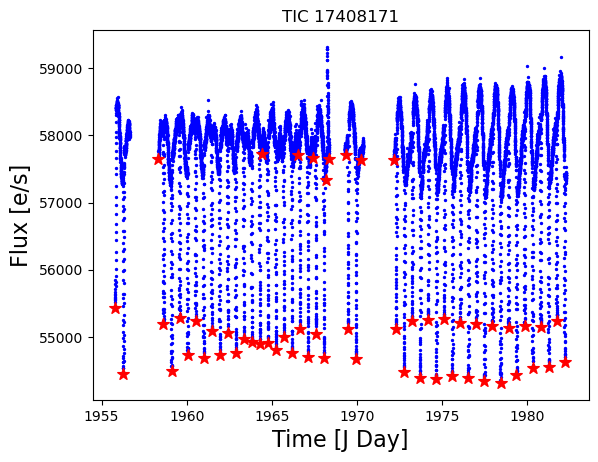

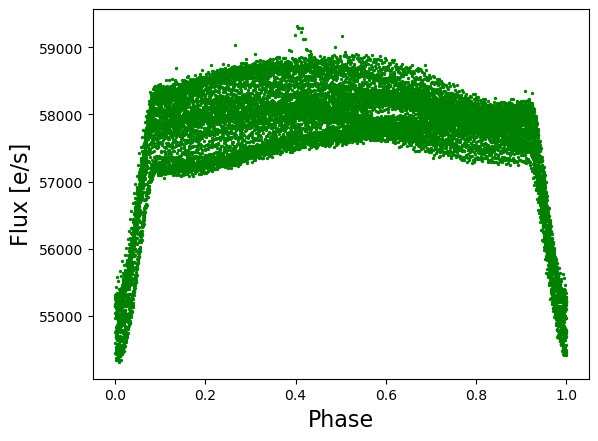

/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/astropy/utils/masked/core.py:855: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*unmasked, **kwargs)


nan


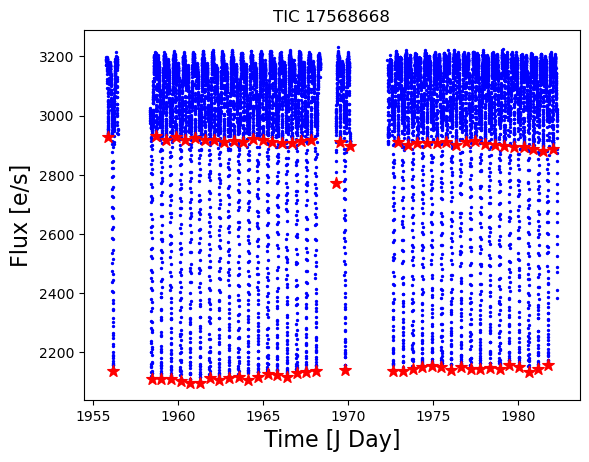

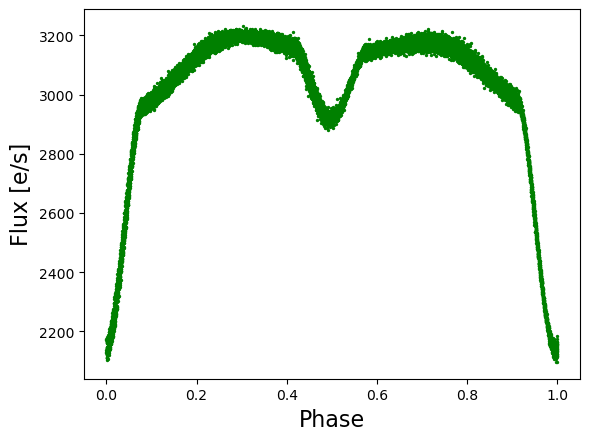

1.1435161551897886


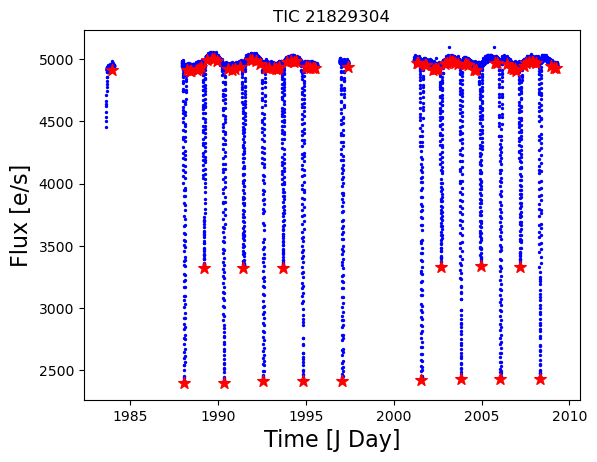

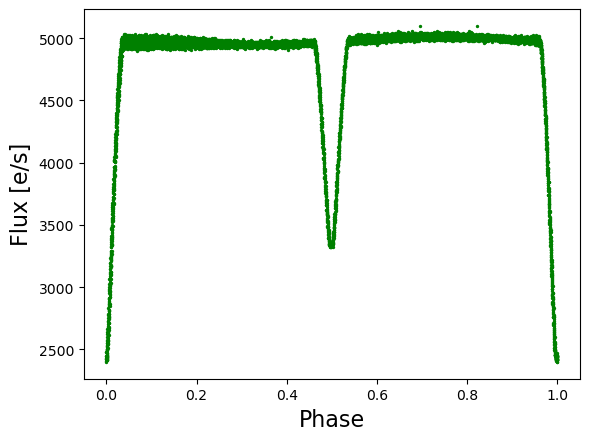

1.1111765147802286


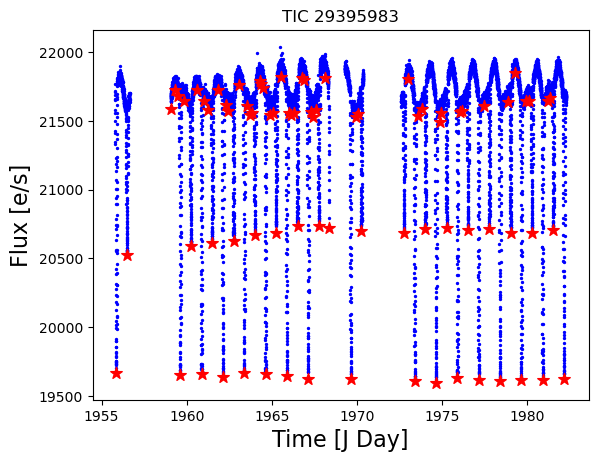

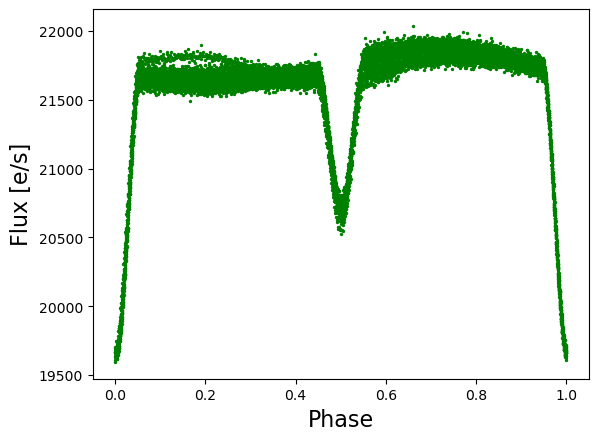

/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/astropy/utils/masked/core.py:855: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(*unmasked, **kwargs)
/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/astropy/utils/masked/core.py:855: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(*unmasked, **kwargs)


nan


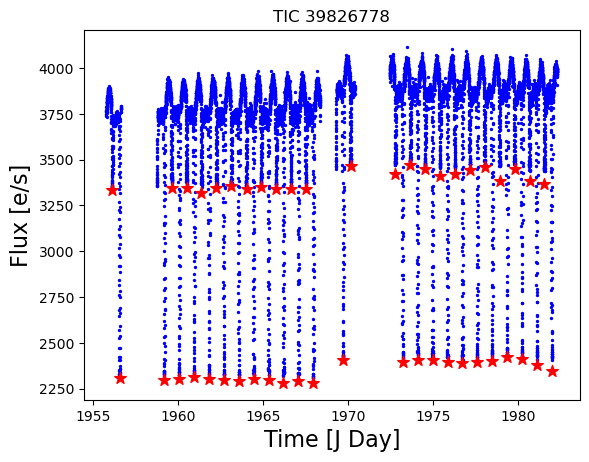

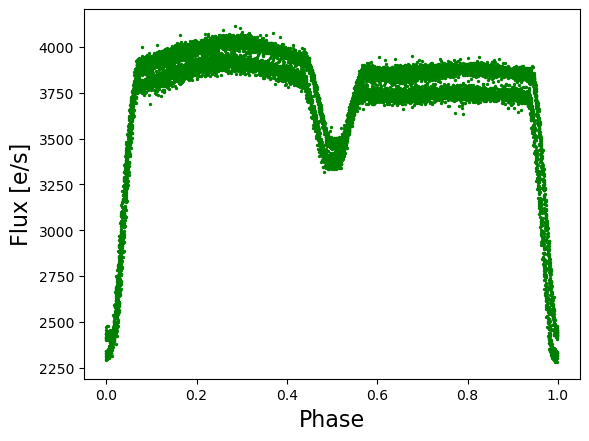

1.1263614476531927


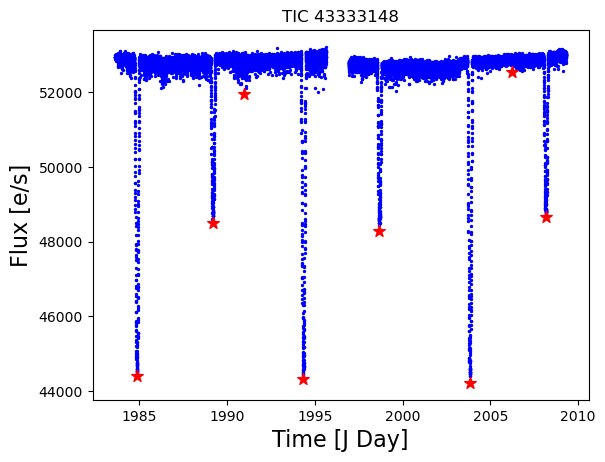

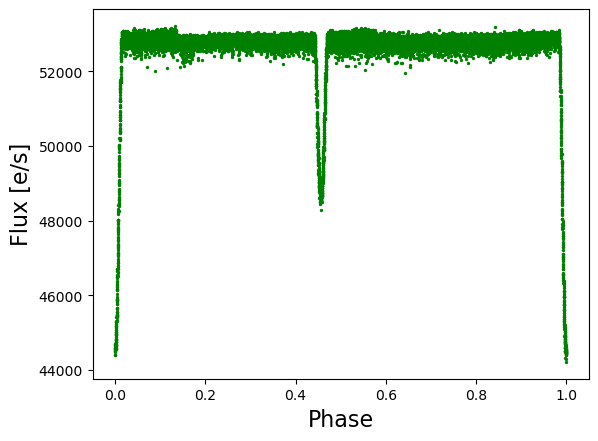

nan


/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/astropy/utils/masked/core.py:855: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*unmasked, **kwargs)


In [11]:
star_A_Masses=[]
star_B_Masses=[]

Seperations=[]

for i in range(len(Our_Sample_Reselect)):
    c = Properties_of_EBs(Our_Sample_Reselect['Obj-ID'][i], Our_Sample_Reselect, Our_Sample_Reselect['Use_Search_Steps'][i])
    c.runAll()
    print(c.M_B/c.M_A)
    star_A_Masses.append(c.M_A)
    star_B_Masses.append(c.M_B)
    Seperations.append(c.au_separation)
    
